In [1]:
import gibbs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score


In [5]:
# Mixture parameters

N=1000

K=4
p = np.array([0.25,0.25,0.25,0.25])

mu= np.array([1,3,5,7])

sigma = np.array([0.5,0.5,0.5,0.5])



In [6]:
#sample the mixture to create artificial data

np.random.seed(0)

Zt = np.random.randint(0,K,N)

X=np.zeros(N)

for k in range(K):
    pts=np.where(Zt==k)[0]
    npts=len(pts)
    X[pts]=np.random.normal(mu[k],sigma[k],npts)

In [8]:
# Prior parameters
mu0 = np.array([0.,0.,0.,0.])
sigma0 = np.array([10.,10.,10.,10.])

c = np.array([1.,1.,1.,1.])




In [9]:
#Gibbs sampling
Niter=1000

burn_in=0.

replica=1

sampling_rate=1;
Nsamp=np.floor((Niter-np.ceil(burn_in*Niter))/sampling_rate).astype(int)
Npar=N+2*K

sampling=np.ones((Nsamp,Npar));


gibbs.GibbsSampling(Niter,K,sampling_rate,burn_in,replica,X,mu0,sigma0,sigma,c,sampling)


1

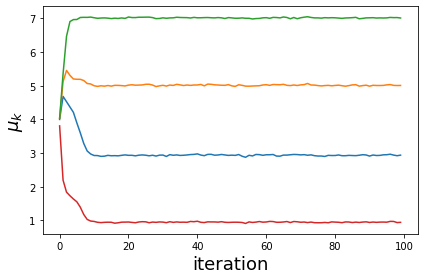

In [10]:
plt.figure()
plt.plot(sampling[:100,0])
plt.plot(sampling[:100,1])
plt.plot(sampling[:100,2])
plt.plot(sampling[:100,3])
plt.xlabel('iteration',size=18)
plt.ylabel(r'$\mu_k$',size=18)
plt.tight_layout()
plt.savefig('convergence_means.png')



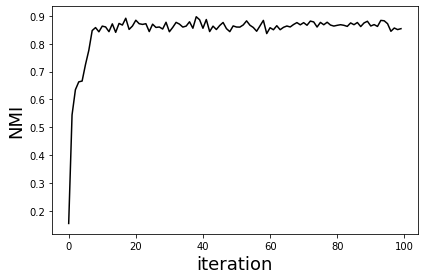

In [13]:
NMI=np.zeros(Niter)


for n in range(Niter):
    NMI[n] = normalized_mutual_info_score(Zt,sampling[n,8:])


plt.figure()
plt.plot(NMI[:100],c='k')
plt.xlabel('iteration',size=18)
plt.ylabel('NMI',size=18)
plt.tight_layout()
plt.savefig('convergence_nmi.png')